<a href="https://colab.research.google.com/github/Alzategelizabeth/Cartografia-/blob/main/Taller%206/MetodoHeuristico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**AHP**

In [ ]:
import numpy as np
A=([1,7,7,9],
   [0.14,1,3,5],
   [0.14,0.33,1,1],
   [0.11,0.2,1,1])
print(A)

([1, 7, 7, 9], [0.14, 1, 3, 5], [0.14, 0.33, 1, 1], [0.11, 0.2, 1, 1])


In [ ]:
B=np.array(A)
values, vectores=np.linalg.eig(B) # Función para calcular los valores y vectores propios
vector_norm=vectores/np.linalg.norm(vectores, ord=1) # normalización de los vectores

print(' valores propios',values)

 valores propios [ 4.2017358 +0.j        -0.07404453+0.9456286j -0.07404453-0.9456286j
 -0.05364675+0.j       ]


In [ ]:
print('esto son los vectores propios', vectores)

esto son los vectores propios [[-0.96115647+0.j         -0.96857365+0.j         -0.96857365-0.j
   0.96524888+0.j        ]
 [-0.24858777+0.j          0.07735285-0.22353421j  0.07735285+0.22353421j
  -0.08381682+0.j        ]
 [-0.09176491+0.j          0.01487551+0.05313097j  0.01487551-0.05313097j
  -0.21627177+0.j        ]
 [-0.07721114+0.j          0.04385474+0.03076797j  0.04385474-0.03076797j
   0.12039876+0.j        ]]


In [ ]:
print('vectores propios normalizados',vector_norm)

vectores propios normalizados [[-0.69360708+0.j         -0.6989596 +0.j         -0.6989596 +0.j
   0.69656032+0.j        ]
 [-0.17939039+0.j          0.05582076-0.16131079j  0.05582076+0.16131079j
  -0.06048541+0.j        ]
 [-0.06622105+0.j          0.01073474+0.03834133j  0.01073474-0.03834133j
  -0.15606994+0.j        ]
 [-0.0557185 +0.j          0.03164725+0.02220334j  0.03164725-0.02220334j
   0.08688433+0.j        ]]


In [ ]:
w=vector_norm[:,0]*-1
print(w)

[0.69360708-0.j 0.17939039-0.j 0.06622105-0.j 0.0557185 -0.j]


In [ ]:
CI=(values[0]-len(values))/(len(values)-1)

CR= CI/1.24

print(CR)#el análisis esta OK

(0.054230054395846994+0j)


##**Método combinado**






**PENDIENTE**

In [ ]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #libreria para graficar
from pandas import DataFrame
import statsmodels.graphics.api as smg #libreria de estadistica

(821560,)

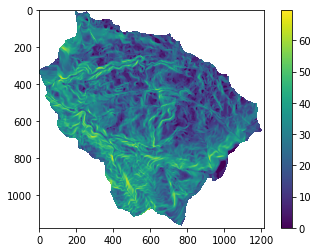

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente2.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
plt.imshow(pendiente)
plt.colorbar()
pendiente_vector_MenM.shape

[0.1 0.3 0.4 0.5 0.6 0.8 nan]


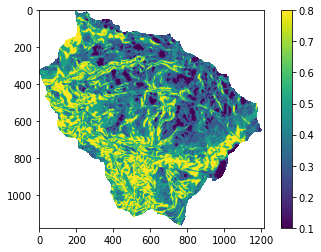

In [ ]:
pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),0.1,pendiente );
pendiente_re=np.where ( (np.logical_and (pendiente_re>=10, pendiente_re<19 )),0.3,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=19, pendiente_re<26 )),0.4,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=26, pendiente_re<33 )),0.5,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=33, pendiente_re<45 )),0.8,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=45, pendiente_re<47 )),0.6,pendiente_re);
pendiente_re=np.where ( pendiente_re>=47,0.5,pendiente_re);
print(np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();

**ASPECTO**

(821560,)

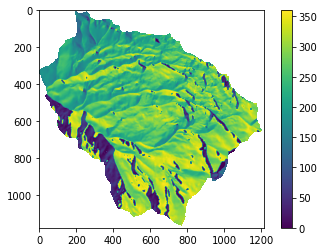

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/aspecto.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-2,np.nan,aspecto)
aspecto=np.where(aspecto<0,0,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

[0.1 0.2 0.3 0.4 0.7 nan]


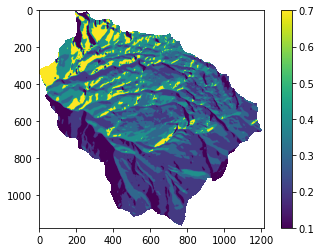

In [ ]:
aspecto_re=np.where ( (np.logical_and (aspecto>=0, aspecto<157 )),0.1,aspecto );
aspecto_re=np.where ( (np.logical_and (aspecto_re>=157, aspecto_re<203 )),0.7,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=203, aspecto_re<248 )),0.4,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=248, aspecto_re<293 )),0.3,aspecto_re);
aspecto_re=np.where ( aspecto_re>=293,0.2,aspecto_re);
print(np.unique(aspecto_re));
plt.imshow(aspecto_re);
plt.colorbar();

**CURVATURA**

(821560,)

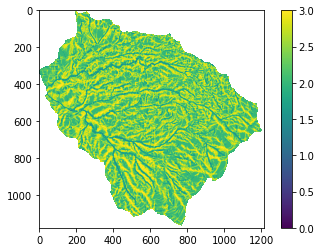

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/curvaturasumppointoraster.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura>3,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
np.unique(curvatura)
curvatura_vector_MenM.shape

[0.1 0.2 0.6 nan]


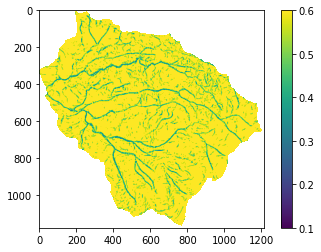

In [ ]:
curvatura_re=np.where ( (np.logical_and (curvatura>=0, curvatura<1 )),0.1,curvatura );
curvatura_re=np.where ( (np.logical_and (curvatura_re>=1, curvatura_re<2 )),0.2,curvatura_re);
curvatura_re=np.where ( curvatura_re>=2,0.6,curvatura_re);
print(np.unique(curvatura_re));
plt.imshow(curvatura_re);
plt.colorbar();

**GEOMORFOLOGÍA**

(821560,)

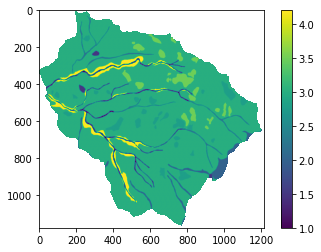

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/subunidades.tif?raw=true')
geomorfologia=raster.read(1)
geomorfologia=np.where(geomorfologia<1,np.nan,geomorfologia)
geomorfologia_vector=geomorfologia.ravel()
geomorfologia_vector_MenM=geomorfologia_vector[~np.isnan(geomorfologia_vector)]
plt.imshow(geomorfologia)
plt.colorbar()
geomorfologia_vector_MenM.shape


In [ ]:
np.unique(geomorfologia)

array([1. , 1.5, 2. , 2.2, 2.8, 3. , 3.5, 4.2, nan])

[0.2  0.3  0.4  0.44 0.56 0.6  0.7  0.9   nan]


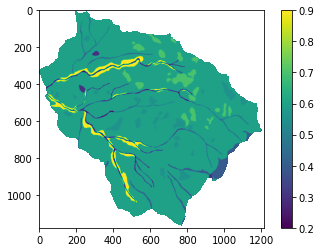

In [ ]:
geomorfologia_re=np.where(geomorfologia<=1.0,0.2,geomorfologia)
geomorfologia_re=np.where(geomorfologia_re==1.5,0.3,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==2.0,0.4,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==2.2,0.44,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==2.8,0.56,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==3.0,0.6,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==3.5,0.7,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==4.2,0.9,geomorfologia_re)
print(np.unique(geomorfologia_re))
plt.imshow(geomorfologia_re);
plt.colorbar();

In [ ]:
print(w[0],w[1],w[2],w[3])

(0.6936070829461486-0j) (0.17939039442905316-0j) (0.06622105433631048-0j) (0.05571849876405067-0j)


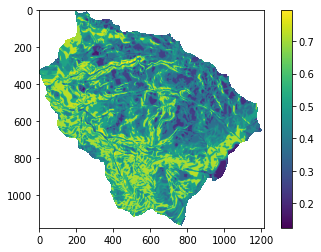

In [ ]:
IS=0.6936*pendiente_re+0.1793*geomorfologia_re+0.0662*curvatura_re+0.05571*aspecto_re
plt.imshow(IS);
plt.colorbar();